

#Audio Classification


In [121]:
import  librosa
import matplotlib.pyplot as plt
from google.colab import drive
import zipfile
import os
import pandas as pd


In [122]:
# # Mount Google Drive
# drive.mount('/content/drive')

# # Path to your zip file
# zip_path = '/content/drive/MyDrive/dogcatsound'

# # Destination folder to extract the zip file
# extracted_folder = '/content/dogcatsound'

# # Check if the destination folder exists, if not, create it
# if not os.path.exists(extracted_folder):
#     os.makedirs(extracted_folder)


# Check the extracted files
print("Files extracted successfully.")


Files extracted successfully.


In [123]:
#test audio sample
audiofilecat = '/content/drive/MyDrive/dogcatsound/test/cat_110.wav'
audiofiledog =  '/content/drive/MyDrive/dogcatsound/test/dog_barking_62.wav'


In [124]:
import IPython.display as ipd
import librosa.display


[-1.6510358e-10 -3.1907400e-11  2.2495894e-13 ...  4.5617126e-02
  5.9033714e-02  2.8228275e-02]
22050


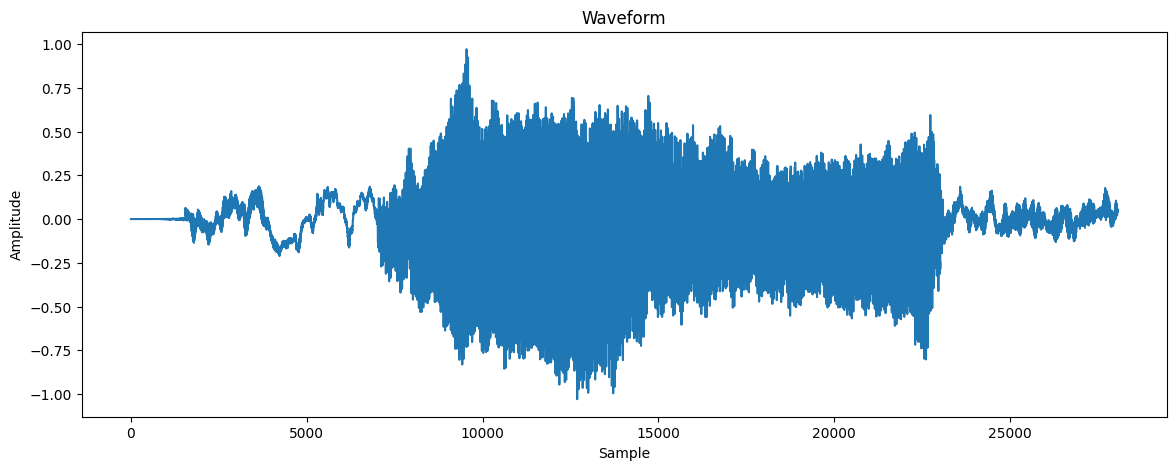

In [125]:
# Load the audio file
data, sample_rate = librosa.load(audiofilecat)
print(data)
print(sample_rate)
# Plot the waveform
plt.figure(figsize=(14,5))
plt.plot(data)
plt.title('Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()
ipd.Audio(audiofilecat)

[-6.0964214e-07 -2.5440742e-05 -2.3938361e-05 ...  1.2523061e-02
  8.3791185e-03  2.3242647e-03]
22050


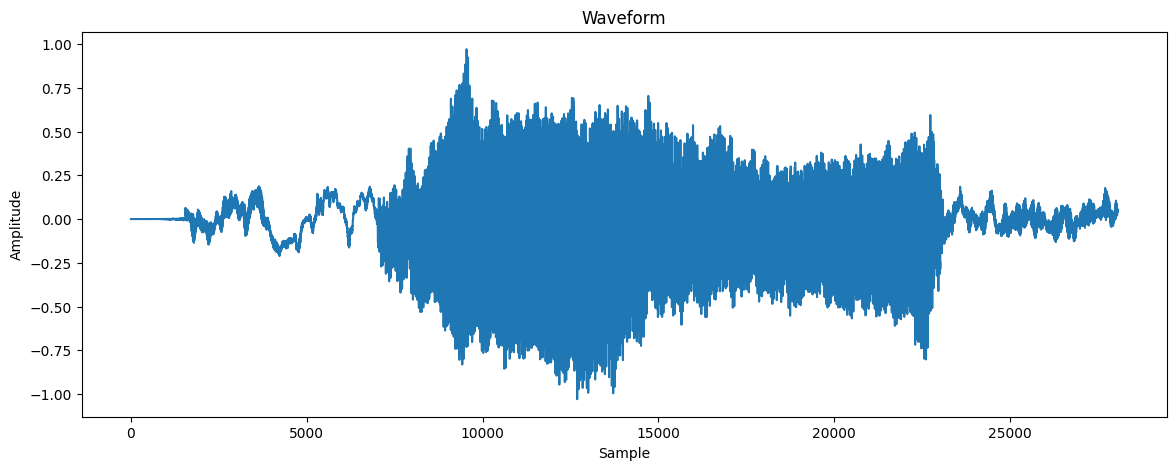

In [126]:
data1 ,sample_rate1 = librosa.load(audiofiledog)
plt.figure(figsize= (14,5))
print(data1)
print(sample_rate1)
plt.plot(data)
plt.title('Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()
ipd.Audio(audiofiledog)


In [127]:
overal = pd.read_csv('/content/drive/MyDrive/dogcatsound/train_test_split.csv')
overal.head()

,Unnamed: 0,test_cat,test_dog,train_cat,train_dog
0,0,cat_22.wav,dog_barking_97.wav,cat_99.wav,dog_barking_33.wav
1,1,cat_116.wav,dog_barking_0.wav,cat_54.wav,dog_barking_86.wav
2,2,cat_155.wav,dog_barking_93.wav,cat_34.wav,dog_barking_45.wav
3,3,cat_58.wav,dog_barking_10.wav,cat_132.wav,dog_barking_76.wav
4,4,cat_77.wav,dog_barking_26.wav,cat_124.wav,dog_barking_4.wav


In [128]:
# overal.drop(overal.columns[0], axis=1 , inplace = True)
overal.head()

,Unnamed: 0,test_cat,test_dog,train_cat,train_dog
0,0,cat_22.wav,dog_barking_97.wav,cat_99.wav,dog_barking_33.wav
1,1,cat_116.wav,dog_barking_0.wav,cat_54.wav,dog_barking_86.wav
2,2,cat_155.wav,dog_barking_93.wav,cat_34.wav,dog_barking_45.wav
3,3,cat_58.wav,dog_barking_10.wav,cat_132.wav,dog_barking_76.wav
4,4,cat_77.wav,dog_barking_26.wav,cat_124.wav,dog_barking_4.wav


In [129]:
overal.isnull().sum()


Unnamed: 0     0
test_cat      66
test_dog      66
train_cat      0
train_dog     51
dtype: int64

In [130]:
# Assuming overal is your DataFrame containing columns 'test_cat' and 'test_dog'
combined_test = pd.concat([overal['train_cat'], overal['train_dog']], axis=0)


# Drop NaN values directly from the DataFrame
combined_test = combined_test.dropna()

# Convert to integers after removing NaN values
target = combined_test.str.contains('dog_barking').astype(int)
# 1 for dog
# 0 for cat
# Create a DataFrame with the new column
combined_with_labeltest = pd.DataFrame({'Test': combined_test, 'Target': target})
print(combined_with_labeltest)

                   Test  Target
0            cat_99.wav       0
1            cat_54.wav       0
2            cat_34.wav       0
3           cat_132.wav       0
4           cat_124.wav       0
..                  ...     ...
59    dog_barking_9.wav       1
60  dog_barking_111.wav       1
61   dog_barking_67.wav       1
62  dog_barking_108.wav       1
63   dog_barking_41.wav       1

[179 rows x 2 columns]


In [131]:

combined_train = pd.concat([overal['test_cat'], overal['test_dog']], axis=0)


# Drop NaN values directly from the DataFrame
combined_train= combined_train.dropna()

# Convert to integers after removing NaN values
target = combined_train.str.contains('dog_barking').astype(int)
# 1 for dog
# 0 for cat
# Create a DataFrame with the new column
combined_with_labeltrain = pd.DataFrame({'Train': combined_train, 'Target': target})


In [132]:
#implementation of feature extraction
import numpy as np

def fe(file_name):
    audio, sample_rate = librosa.load(file_name)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features
xv  = fe('/content/drive/MyDrive/dogcatsound/test/dog_barking_99.wav')

In [133]:
!pip install resampy
!pip install list

ERROR: Could not find a version that satisfies the requirement list (from versions: none)
ERROR: No matching distribution found for list


In [134]:

train_path = '/content/drive/MyDrive/dogcatsound/train'
test_path = '/content/drive/MyDrive/dogcatsound/test'
trainfiles = os.listdir(train_path)
testfiles  = os.listdir(test_path)

def madetest(files, test_path):
    data = []
    if len(files) > 0:
        for file in files:
            path = os.path.join(test_path, file)
            label = 1 if file.startswith('dog') else 0
            value = fe(path)  # Assuming fe() is defined elsewhere
            data.append((file, value, label))
        df = pd.DataFrame(data, columns=["name", "value", "target"]).sample(frac=1).reset_index(drop=True)
        return df


In [135]:
test_df = madetest(testfiles, test_path)
train_df = madetest(trainfiles , train_path)

In [136]:
test_df.head()

,name,value,target
0,dog_barking_59.wav,"[-276.50775, 171.82117, -19.866983, -46.56995,...",1
1,cat_112.wav,"[-218.63521, 183.29755, -61.159958, -13.373679...",0
2,cat_3.wav,"[-332.31345, 127.35694, -13.307217, 23.759363,...",0
3,cat_135.wav,"[-277.4863, 106.558075, -5.063033, 16.276915, ...",0
4,cat_55.wav,"[-216.26382, 60.371777, -115.7852, 17.613323, ...",0


In [137]:
train_df.head()

,name,value,target
0,cat_49.wav,"[-252.69316, 102.45413, -28.68035, 26.838879, ...",0
1,dog_barking_96.wav,"[-390.18668, 90.86908, 16.403969, -12.109167, ...",1
2,dog_barking_51.wav,"[-261.34692, 178.9064, -17.028316, -29.680311,...",1
3,cat_132.wav,"[-284.8194, 88.3401, -27.625483, 5.2105484, -3...",0
4,cat_53.wav,"[-245.95549, 62.67123, -96.28589, 18.605526, -...",0


In [138]:
!pip install np_utils

In [139]:
xtest = np.array(test_df['value'].tolist())
ytest = np.array(test_df['target'])
xtrain =np.array( train_df['value'].tolist())
ytrain = np.array(train_df['target'])

In [140]:
### Label Encoding
ytrain=np.array(pd.get_dummies(ytrain))
ytest = np.array(pd.get_dummies(ytest))

In [141]:
xtrain = xtrain.reshape((210,40))
xtest = xtest.reshape(67,40)

In [142]:
!pip install keras.utils

In [143]:
from keras.models import Sequential
from keras.layers import Dense  , Dropout , Flatten , Activation
from keras.layers import Conv2D , Convolution2D , MaxPooling2D , GlobalAveragePooling2D
from keras.optimizers import Adam

# from keras.utils import np_utils

from sklearn import metrics
rows = 40
columns = 173
channels = 1
num_labels = 2
filter_size = 2

In [144]:
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D

model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(xtrain.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2, padding='same'))  # Adjusted pooling size and added padding
model.add(Dropout(0.2))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(0.2))

model.add(GlobalAveragePooling1D())

model.add(Dense(num_labels, activation='softmax'))


In [145]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary
model.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 38, 16)            64        
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 19, 16)            0         
 ng1D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 19, 16)            0         
                                                                 
 conv1d_13 (Conv1D)          (None, 17, 32)            1568      
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 9, 32)             0         
 ng1D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 9, 32)            

In [146]:
xtest.shape

(67, 40)

In [147]:
xtrain = xtrain.reshape((xtrain.shape[0], xtrain.shape[1], 1))
xtest = xtest.reshape((xtest.shape[0], xtest.shape[1], 1))

In [148]:
from keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 72
num_batch_size = 256

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(xtrain, ytrain, batch_size=num_batch_size, epochs=num_epochs, validation_data=(xtest, ytest), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/72
1/1 [==============================] - ETA: 0s - loss: 3.3276 - accuracy: 0.4286
Epoch 1: val_loss improved from inf to 1.07095, saving model to saved_models/weights.best.basic_cnn.hdf5
1/1 [==============================] - 3s 3s/step - loss: 3.3276 - accuracy: 0.4286 - val_loss: 1.0709 - val_accuracy: 0.5522
Epoch 2/72
1/1 [==============================] - ETA: 0s - loss: 2.3089 - accuracy: 0.5524
Epoch 2: val_loss did not improve from 1.07095
1/1 [==============================] - 0s 88ms/step - loss: 2.3089 - accuracy: 0.5524 - val_loss: 1.6378 - val_accuracy: 0.5821
Epoch 3/72
1/1 [==============================] - ETA: 0s - loss: 2.6627 - accuracy: 0.5762

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss did not improve from 1.07095
1/1 [==============================] - 0s 90ms/step - loss: 2.6627 - accuracy: 0.5762 - val_loss: 1.3486 - val_accuracy: 0.5821
Epoch 4/72
1/1 [==============================] - ETA: 0s - loss: 1.6851 - accuracy: 0.6381
Epoch 4: val_loss improved from 1.07095 to 0.85337, saving model to saved_models/weights.best.basic_cnn.hdf5
1/1 [==============================] - 0s 155ms/step - loss: 1.6851 - accuracy: 0.6381 - val_loss: 0.8534 - val_accuracy: 0.5821
Epoch 5/72
1/1 [==============================] - ETA: 0s - loss: 1.5323 - accuracy: 0.5667
Epoch 5: val_loss improved from 0.85337 to 0.55799, saving model to saved_models/weights.best.basic_cnn.hdf5
1/1 [==============================] - 0s 146ms/step - loss: 1.5323 - accuracy: 0.5667 - val_loss: 0.5580 - val_accuracy: 0.7313
Epoch 6/72
1/1 [==============================] - ETA: 0s - loss: 1.5044 - accuracy: 0.5762
Epoch 6: val_loss improved from 0.55799 to 0.54615, saving model to save

In [149]:
score = model.evaluate(xtrain, ytrain, verbose=0)
print("Training Accuracy: ", score[1])
print(xtest.shape)
print(xtrain.shape)
score = model.evaluate(xtest, ytest, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.8904761672019958
(67, 40, 1)
(210, 40, 1)
Testing Accuracy:  0.8805969953536987


In [152]:
print(xv.shape)
xv = fe("/content/mixkit-dog-barking-twice-1.wav")
xv = xv.reshape((1, xv.shape[0], 1))

model.predict(xv)

(1, 40, 1)
1/1 [==============================] - 0s 32ms/step


array([[0.24209695, 0.75790304]], dtype=float32)